In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("results.csv", names=["base", "h2s", "i", "k", "method", "n_causals", "svm", "lr"])
df

,base,h2s,i,k,method,n_causals,svm,lr
0,1.0,0.3,10,5,ae,0,0.537736,0.677696
1,1.0,0.3,10,25,ae,2,0.656998,0.740636
2,1.0,0.3,10,100,ae,2,0.710786,0.718952
3,1.0,0.3,10,300,ae,4,0.700648,0.739792
4,1.0,0.3,10,5,p,0,0.487750,0.587159
...,...,...,...,...,...,...,...,...
1059,1.0,0.7,9,25,hsic,3,0.741092,0.899038
1060,1.0,0.7,9,5,ln,2,0.407381,0.842336
1061,1.0,0.7,9,25,ln,3,0.709276,0.925905
1062,1.0,0.7,9,100,ln,5,0.815611,0.878959


In [1]:
from FADS.FeatureSelector import pValue
from FADS.input import get_dset

dset = get_dset("/home/shussain/Simulated_data/14072021/0.3/base_1.2/sim_1/sim_1/PS/output/")

In [2]:
fs = pValue(dset)
fs.train()

generating p values: 100%|██████████| 1000/1000 [00:07<00:00, 141.92it/s]


In [31]:
np.save("asas", fs.importance)

array([ 3.03430080e+00,  8.98482538e-02,  7.20546108e-01,  1.64515953e+00,
        2.00193477e+00,  4.61567628e-01,  1.48475450e-01,  1.00365453e+00,
        1.00429704e+00,  1.29164048e+00,  3.92982785e-01,  9.36213856e-01,
        4.68104054e-01,  1.40142871e+00,  2.34904070e+00,  1.52224449e+00,
        1.21993345e+00,  1.26063782e+00,  8.73336641e-01,  5.74532330e-01,
        3.12691755e-01,  1.68401613e-01,  3.81765546e-02,  1.71455659e+00,
        3.85872290e+00,  2.78454211e+00,  4.04270327e-01,  4.46865325e+00,
        2.12711210e+00,  2.57171371e+00,  3.01380725e+00,  1.35644747e+00,
        2.44763032e+00,  2.48629004e+00,  4.24819568e+00,  4.05658219e+00,
        3.92682734e+00,  2.28640110e+00,  2.44141894e+00,  1.68125719e+00,
        1.30449680e+00,  1.34947330e-01,  8.52441114e-02,  1.09236517e+00,
        3.13660749e-01,  1.39597177e-01,  1.46655038e-01,  6.79046540e-01,
        3.69273585e-01,  3.69273585e-01,  3.75330556e-01,  8.68262395e-01,
        4.12210986e-01,  

In [3]:
np.unique(df["method"])

array(['ae', 'hsic', 'ln', 'p'], dtype=object)

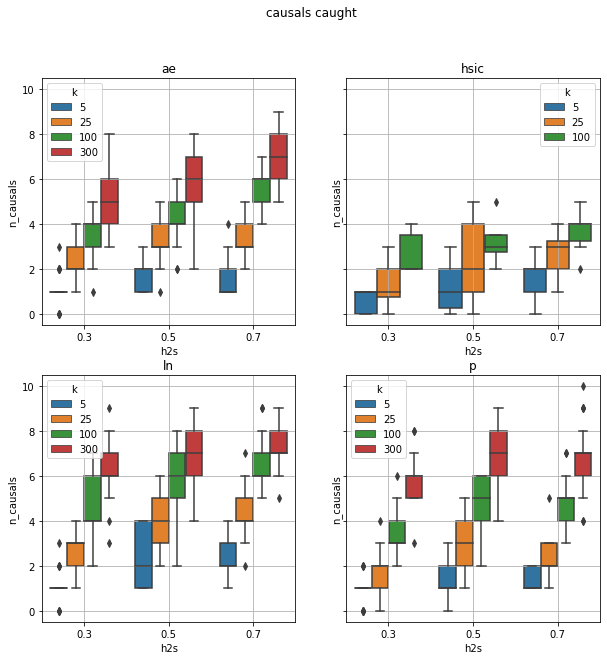

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

for method, ax in zip(np.unique(df["method"]), axes.ravel()):
    plt.sca(ax)
    sns.boxplot(x="h2s", y="n_causals", hue="k", data=df.query(f"method == '{method}'"))
    plt.title(method)
    plt.grid()

plt.suptitle("causals caught")
plt.savefig("ncausals.jpeg")

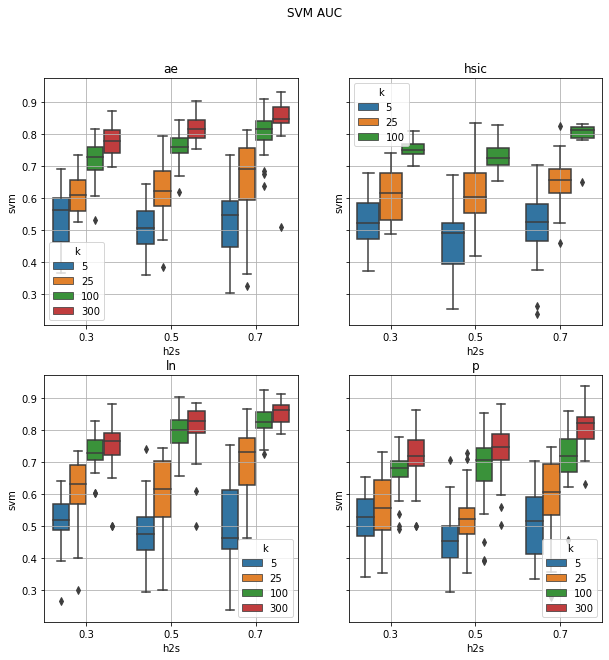

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

for method, ax in zip(np.unique(df["method"]), axes.ravel()):
    plt.sca(ax)
    sns.boxplot(x="h2s", y="svm", hue="k", data=df.query(f"method == '{method}'"))
    plt.title(method)
    plt.grid()

plt.suptitle("SVM AUC")
plt.savefig("svm.jpeg")

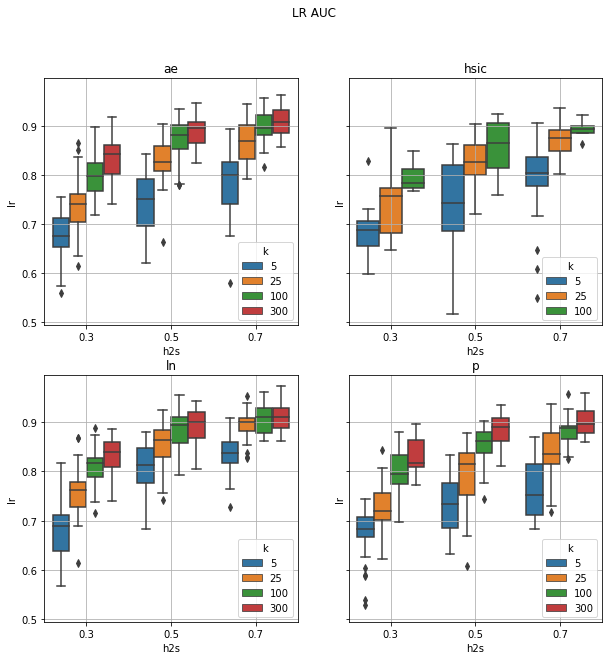

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

for method, ax in zip(np.unique(df["method"]), axes.ravel()):
    plt.sca(ax)
    sns.boxplot(x="h2s", y="lr", hue="k", data=df.query(f"method == '{method}'"))
    plt.title(method)
    plt.grid()
    
plt.suptitle("LR AUC")
plt.savefig("lr.jpeg")